# Homework 5 - Assignment 2

### Response authored by: JKtours (jlk635)

In [2]:
#Usual packages for import including spicy_stats

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats


Populating the interactive namespace from numpy and matplotlib


Your notebook should show the distributions, the models, clearly state the H0 null hypothesis, and properly interpret the tests (remember captions, significance, etc etc)

# Test the difference between a Binomial distribution and a Gaussian distribution, changing the parameters of the Binomial (varying n, with p=0.2) using: 
    
#### 1) KS - null hypothesis
    
#### 2) AD - null hypothesis
    
#### 3) KL - null hypothesis
    
#### 4) Pearson's chisq (Goodness-of-fit) - null hypothesis

In [3]:
nInput = np.array(range(500))+1
binP = 0.2

Generate the binomial distribution for each n in the range (remember p (binP) is fixed as 20%).

In [31]:
#generate the distribution
alpha = 0.05
np.random.seed(888)
binSampleSize = 1000
ksSummary = np.zeros((500,2))
adSummary = np.zeros((500,2))
klSummary = np.zeros((500,1))
chSummary = np.zeros((500,2))

for i in nInput:
    dist_Bin = (np.random.binomial(nInput[i-1], binP, binSampleSize) - nInput[i-1] * binP) / np.sqrt(nInput[i-1] * binP * (1-binP))
    
    #print(KS_result)
    
    ksSummary[i-1, 0] = scipy.stats.kstest(dist_Bin,'norm')[0]    # ksStat 
    ksSummary[i-1, 1] = scipy.stats.kstest(dist_Bin,'norm')[1]    # ksPval
    
    adSummary[i-1, 0] = scipy.stats.anderson(dist_Bin, dist='norm')[0] # adStat
    adSummary[i-1, 1] = scipy.stats.anderson(dist_Bin, dist='norm')[1][2] # adThreshold at alpha = 0.05
    
    # for KL and Pearson's chisq we need to simulate the normal distribution 
    theBaskets = np.linspace(min(dist_Bin), max(dist_Bin), 10) 
    basketCenters = theBaskets[:-1] + 0.5 * (theBaskets[1] - theBaskets[0])
    
    klSummary[i-1] =  scipy.stats.entropy(np.histogram(dist_Bin, bins=theBaskets)[0] / binSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters)) #klPval?
    
    chSummary[i-1, 0] = scipy.stats.chisquare(np.histogram(dist_Bin, bins=theBaskets)[0] / binSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[0] # chStat
    chSummary[i-1, 1] = scipy.stats.chisquare(np.histogram(dist_Bin, bins=theBaskets)[0] / binSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[1] # chPval
    
    

## Plot the results for binomial

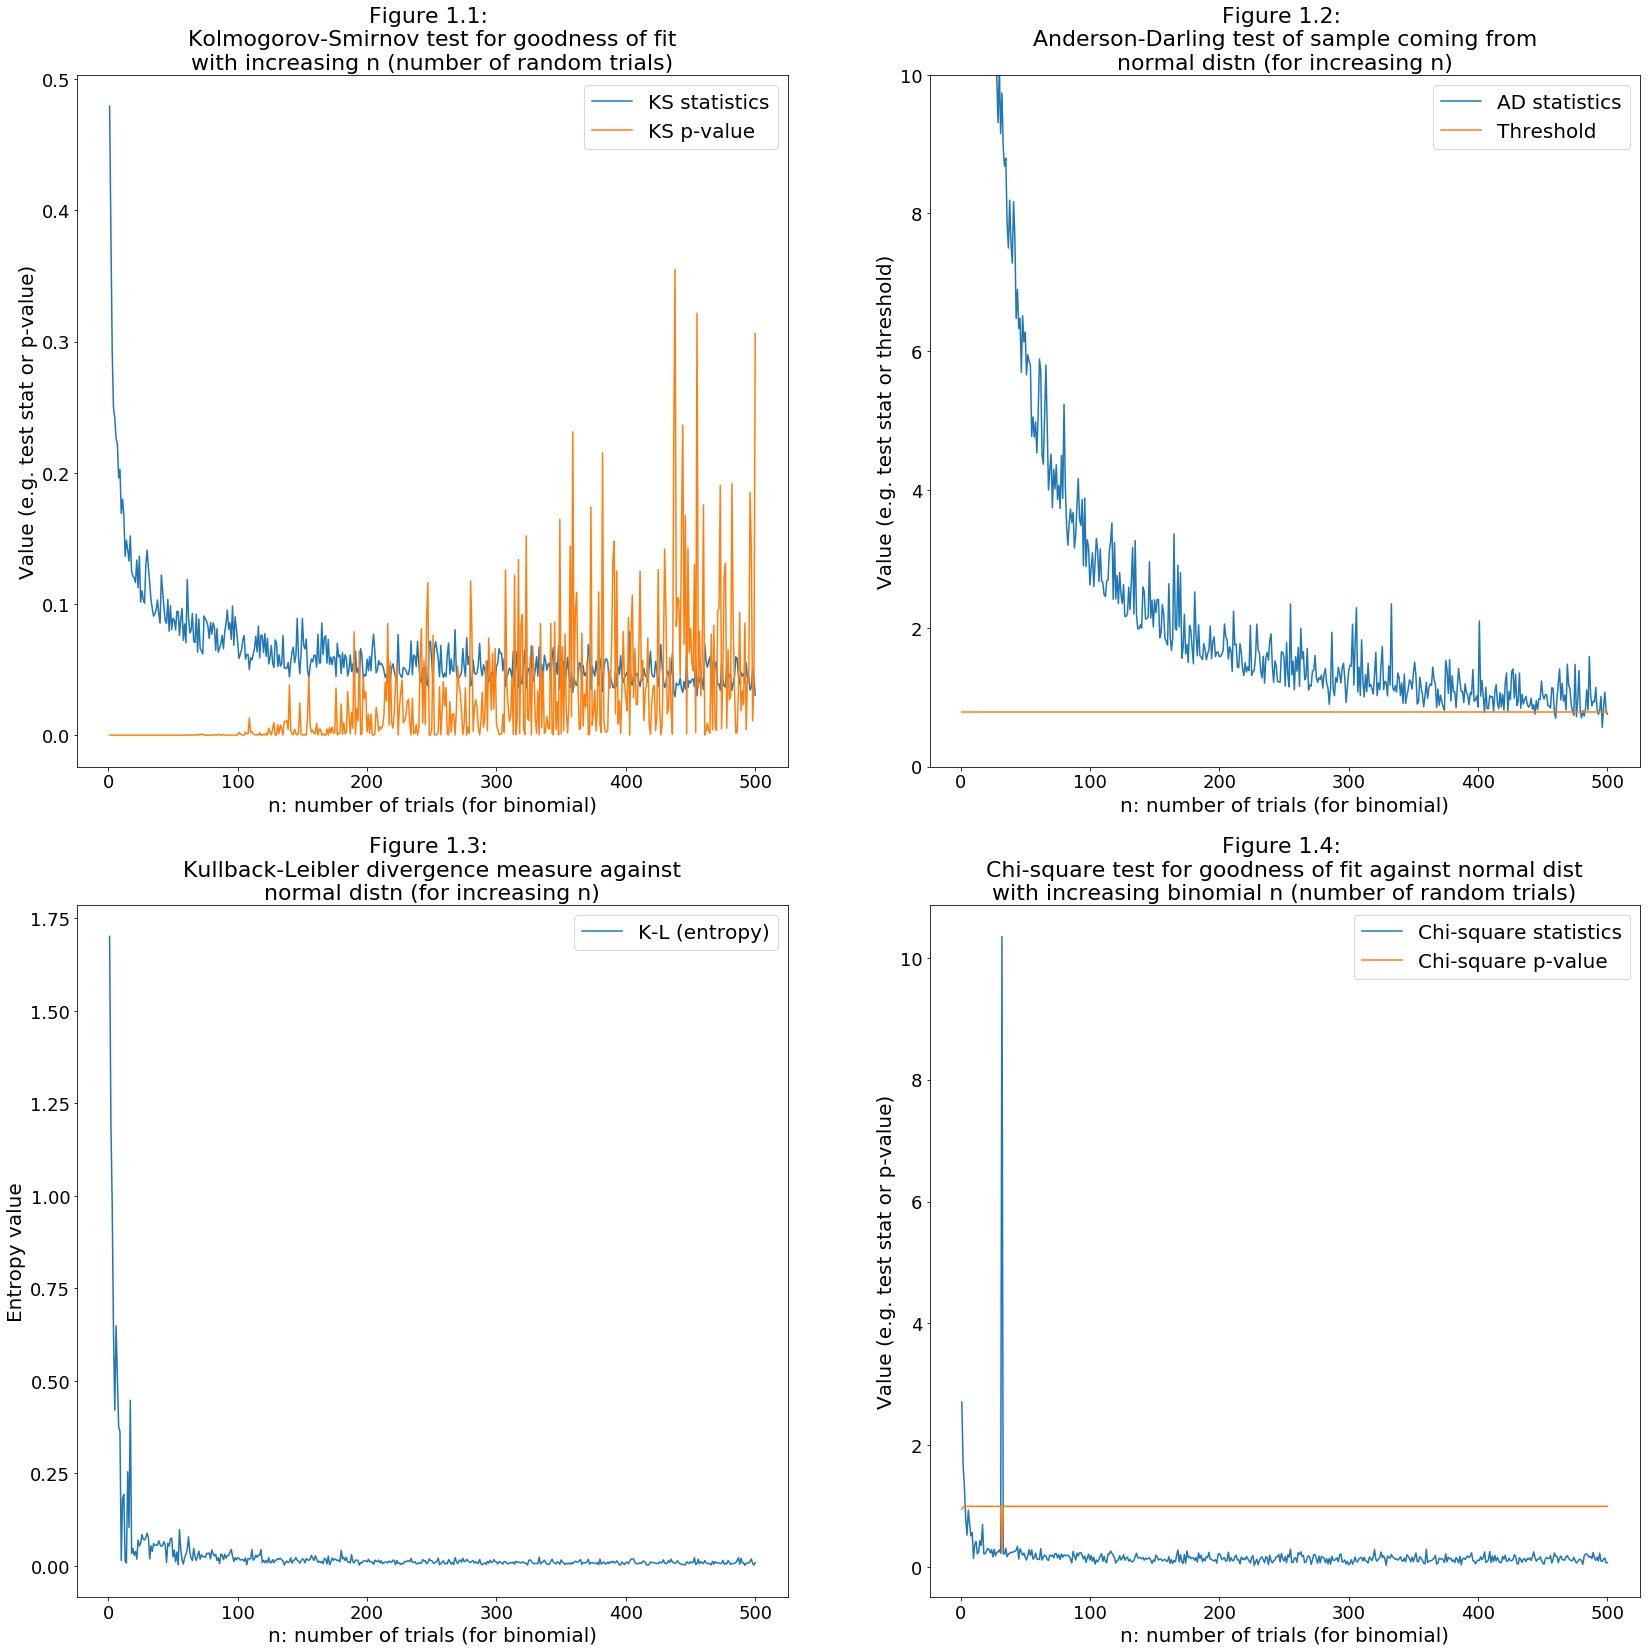

In [59]:

fig = pl.figure(figsize = (28,28))

fig.add_subplot(221)
pl.plot(nInput, ksSummary[ : , 0], label='KS statistics')
pl.plot(nInput, ksSummary[ : , 1], label='KS p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 1.1: \n Kolmogorov-Smirnov test for goodness of fit \nwith increasing n (number of random trials)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(222)
pl.plot(nInput, adSummary[ : , 0],  label='AD statistics')
pl.plot(nInput ,adSummary[ : , 1], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 1.2: \n Anderson-Darling test of sample coming from \nnormal distn (for increasing n)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or threshold)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(223)
pl.plot(nInput , klSummary, label='K-L (entropy)')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 1.3: \n Kullback-Leibler divergence measure against \nnormal distn (for increasing n)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Entropy value", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(224)
pl.plot(nInput, chSummary[ : , 0], label='Chi-square statistics')
pl.plot(nInput, chSummary[ : , 1], label='Chi-square p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 1.4: \n Chi-square test for goodness of fit against normal dist \nwith increasing binomial n (number of random trials)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20);

# Comment!
Lots of comments, at least one per chart... Hypothesis, anything cool unusual e.g. in the chi-square, there's a spike

# Testing the difference between a Poisson distribution and a Gaussian distribution, changing the parameters of the Poisson (varying mean) using:
    
#### 1) KS
    
#### 2) AD
    
#### 3) KL
    
#### 4) Pearson's chisq (Goodness-of-fit)

In [73]:
lamInput = np.array(range(100))+1 #varying lambdas.. mean of the Poisson distribution
lamInputLen = len(lamInput)

Generate the Poisson distribution for each $\lambda$ in the range. A sample size of 250 has been chosen for each sampling of Poisson random variables (i.e. for each mean (in $lamInput$), a sample of 250 observations is drawn from a Poisson distribution with that given mean and variance).

In [76]:
#generate the distribution
alpha = 0.05
np.random.seed(666)
poissSampleSize = 250
ksSummary = np.zeros((lamInputLen,2))
adSummary = np.zeros((lamInputLen,2))
klSummary = np.zeros((lamInputLen,1))
chSummary = np.zeros((lamInputLen,2))

for i in lamInput:
    distPoiss = (np.random.poisson(lamInput[i-1], poissSampleSize) - lamInput[i-1]) / np.sqrt(lamInput[i-1])
    
    #print(KS_result)
    
    ksSummary[i-1, 0] = scipy.stats.kstest(distPoiss,'norm')[0]    # ksStat 
    ksSummary[i-1, 1] = scipy.stats.kstest(distPoiss,'norm')[1]    # ksPval
    
    adSummary[i-1, 0] = scipy.stats.anderson(distPoiss, dist='norm')[0] # adStat
    adSummary[i-1, 1] = scipy.stats.anderson(distPoiss, dist='norm')[1][2] # adThreshold at alpha = 0.05
    
    # for KL and Pearson's chisq we need to simulate the normal distribution 
    theBaskets = np.linspace(min(distPoiss), max(distPoiss), 10) 
    basketCenters = theBaskets[:-1] + 0.5 * (theBaskets[1] - theBaskets[0])
    
    klSummary[i-1] =  scipy.stats.entropy(np.histogram(distPoiss, bins=theBaskets)[0] / poissSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters)) #klPval?
    
    chSummary[i-1, 0] = scipy.stats.chisquare(np.histogram(distPoiss, bins=theBaskets)[0] / poissSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[0] # chStat
    chSummary[i-1, 1] = scipy.stats.chisquare(np.histogram(distPoiss, bins=theBaskets)[0] / poissSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[1] # chPval
    
    

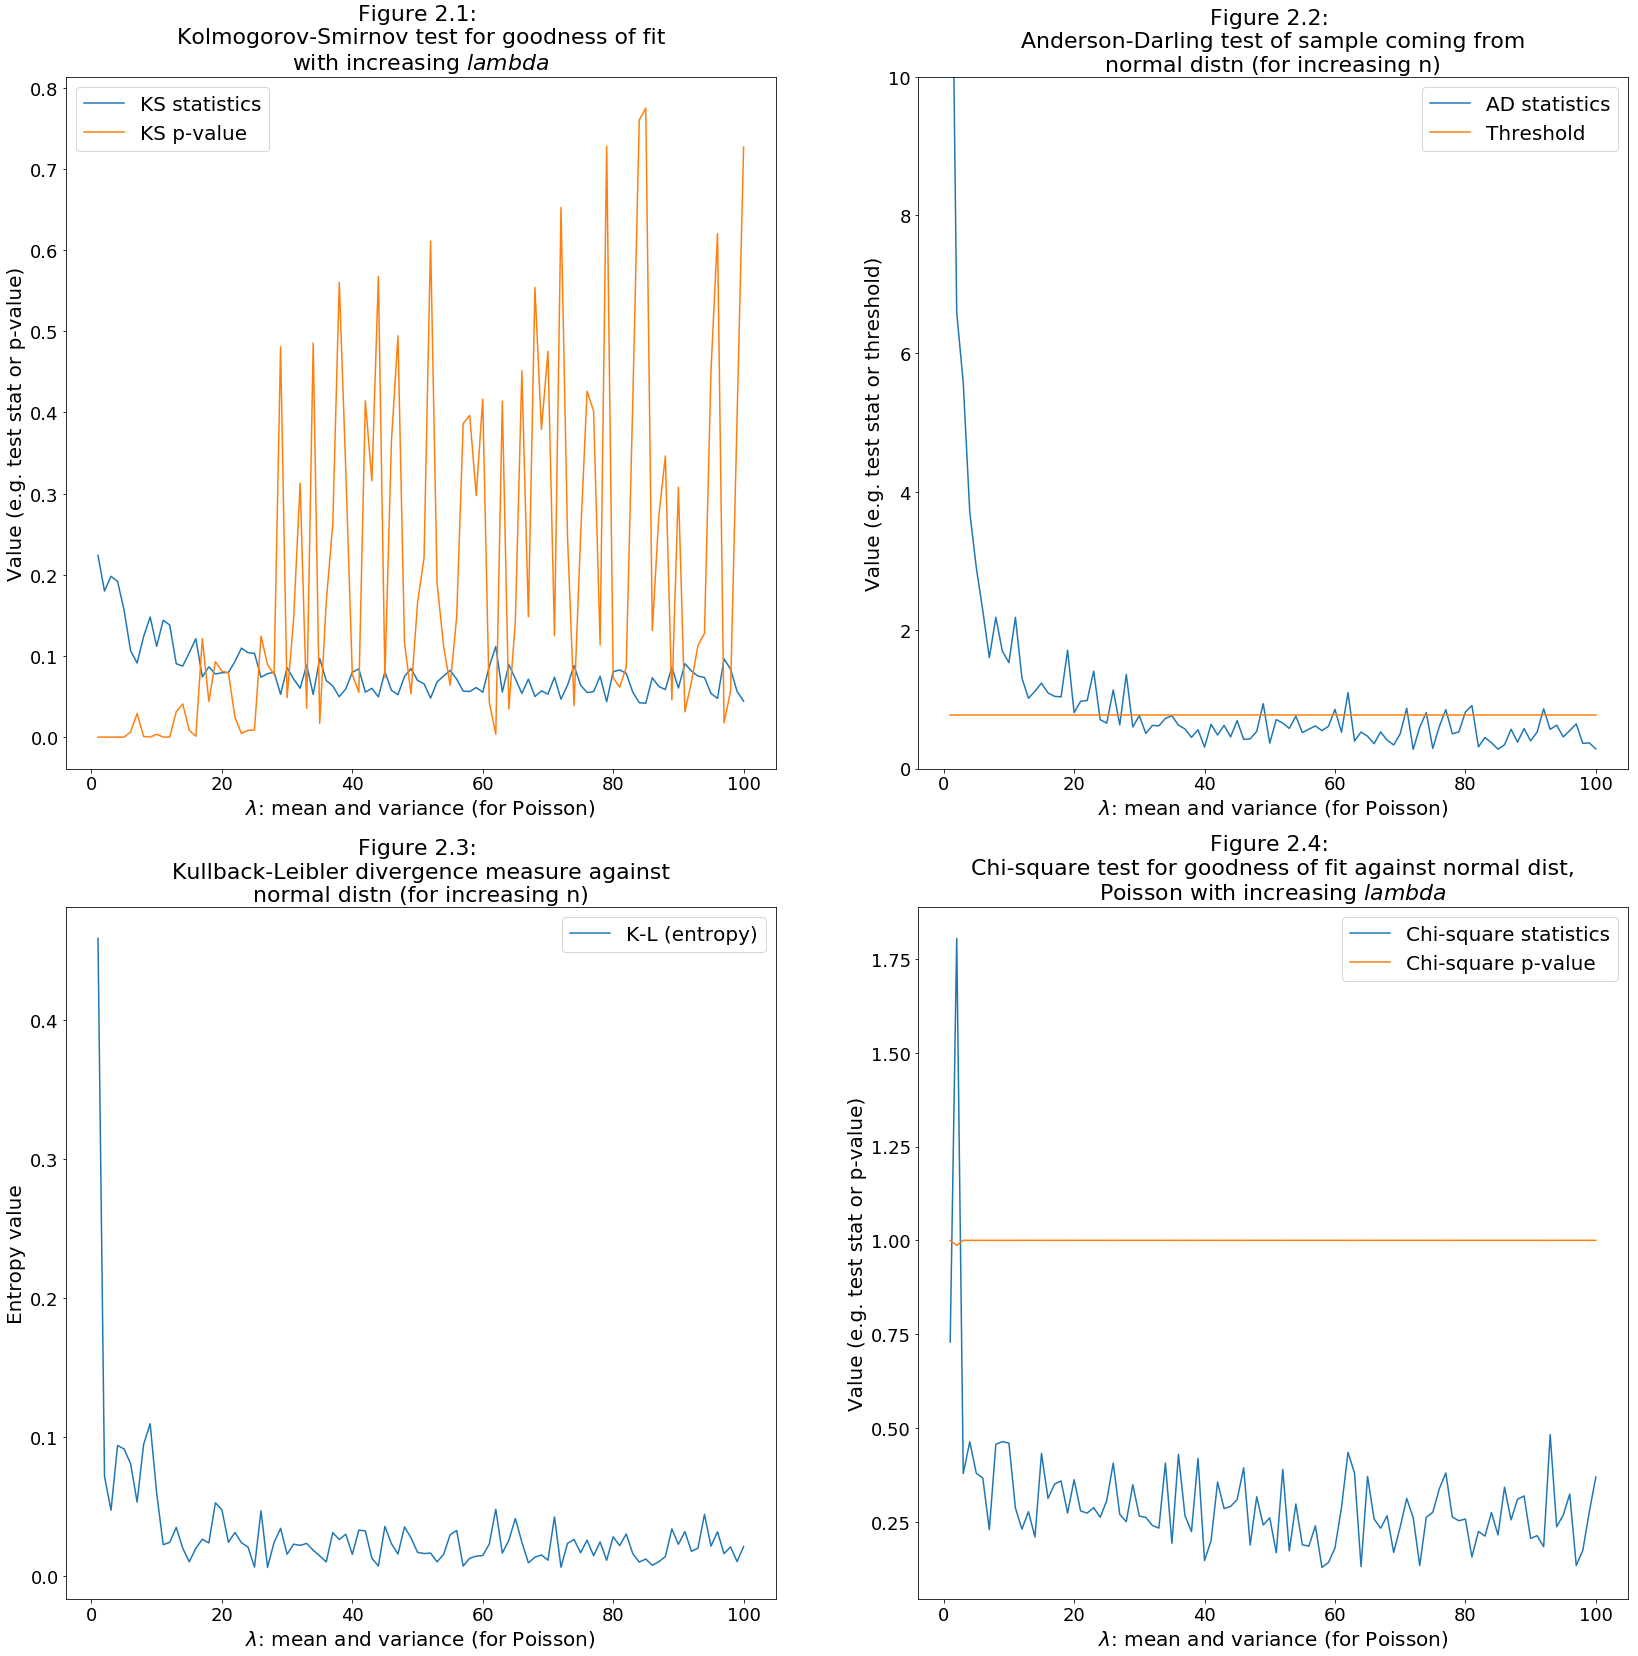

In [82]:

fig = pl.figure(figsize = (28,28))

fig.add_subplot(221)
pl.plot(lamInput, ksSummary[ : , 0], label='KS statistics')
pl.plot(lamInput, ksSummary[ : , 1], label='KS p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 2.1: \n Kolmogorov-Smirnov test for goodness of fit \nwith increasing $lambda$", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(222)
pl.plot(lamInput, adSummary[ : , 0],  label='AD statistics')
pl.plot(lamInput ,adSummary[ : , 1], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 2.2: \n Anderson-Darling test of sample coming from \nnormal distn (for increasing n)", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or threshold)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(223)
pl.plot(lamInput , klSummary, label='K-L (entropy)')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 2.3: \n Kullback-Leibler divergence measure against \nnormal distn (for increasing n)", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Entropy value", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(224)
pl.plot(lamInput, chSummary[ : , 0], label='Chi-square statistics')
pl.plot(lamInput, chSummary[ : , 1], label='Chi-square p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 2.4: \n Chi-square test for goodness of fit against normal dist, \nPoisson with increasing $lambda$", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20);

# Comment!
Lots of comments, at least one per chart... Hypothesis, anything cool unusual e.g. in the chi-square, there's a spike

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:" data-toc-modified-id="Testing-the-difference-between-a-Binomial/Poisson-distribution-and-a-Gaussian-distribution-as-you-change-the-parameters-of-the-Binomial/Poisson-using:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using:</a></div><div class="lev1 toc-item"><a href="#AD-and-KS-test" data-toc-modified-id="AD-and-KS-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AD and KS test</a></div><div class="lev2 toc-item"><a href="#KS:-high-p-value-pvalue&gt;0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected" data-toc-modified-id="KS:-high-p-value-pvalue>0.05:-H0-that-sample-comes-from-a-Gaussian-distribution-cannot-be-rejected-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KS: high p-value pvalue&gt;0.05: H0 that sample comes from a Gaussian distribution cannot be rejected</a></div><div class="lev2 toc-item"><a href="#AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected." data-toc-modified-id="AD:-at-alpha-=-0.05-the-statistics-=-0.26-is-smaller-than-the-0.784-critical-value-for-$alpha$=0.05-(thresh_0.05-=-0.784):-the-H0-cannot-be-rejected.-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax MathJax_Processing" id="MathJax-Element-2-Frame" tabindex="0"></span><script type="math/tex" id="MathJax-Element-2">alpha</script>=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.</a></div><div class="lev1 toc-item"><a href="#try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)" data-toc-modified-id="try-writing-down-the-null-for-each-test-and-see-if-scipy-manual-agrees-with-you-(the-manual-spells-out-the-Null)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)</a></div><div class="lev1 toc-item"><a href="#KL-DIVERGENCE" data-toc-modified-id="KL-DIVERGENCE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>KL DIVERGENCE</a></div><div class="lev1 toc-item"><a href="#BINOMIAL---INSTRUCTIONS-for-assignment" data-toc-modified-id="BINOMIAL---INSTRUCTIONS-for-assignment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BINOMIAL - INSTRUCTIONS for assignment</a></div><div class="lev2 toc-item"><a href="#WRITE-A-CAPTION-HERE-IN-THIS-CELL.." data-toc-modified-id="WRITE-A-CAPTION-HERE-IN-THIS-CELL..-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>WRITE A CAPTION HERE IN THIS CELL..</a></div><div class="lev1 toc-item"><a href="#POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution" data-toc-modified-id="POISSON---repeat-the-exercise-for-the-Poisson-distribution-increasing-the-lambda-parameter-of-the-distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution</a></div><div class="lev1 toc-item"><a href="#NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number" data-toc-modified-id="NOTE-on-KL-divergence:-the-KL-divergence-is-a-measure-of-how-much-approximation-you-have-to-do-to-represent-one-distribution-with-the-other-in-terms-of-information-content.-You-can-see-what-it-looks-point-by-point,-before-you-integrate-and-get-a-single-distance-number-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number</a></div>


# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
1) KS
    
2) AD
    
3) KL
    
4) Pearson's chisq (not done in this example)
    
I want you to use the scipy.stats package for this. For KS (Kolmogorov-Smirnoff) and AD (Anderson Darling) you simply need to generate the distribution against which you can test a normal (Gaussian) distribution: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL divergence test and chi square test do not. 

Here are the manual pages for the three tests I am going to use. _scipy_ does not have the best documentation, but generally it provides clear examples of use for its functions. Read the documentation carefully.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

# AD and KS test

I need to figure out what each test function returns. Let me run them once testing an obvious result: is a Gaussian Gaussian? I know the answer so this is a reality check to make sure I understand the output of the functions (and read the manual at the same time!)

I am testing a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial _w small np against a Gaussian model_. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

In [16]:
#generate the distribution
alpha = 0.05
np.random.seed(888)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("") 

normal on normal KstestResult(statistic=0.022532422496175264, pvalue=0.69027496130231625)
normal on normal AndersonResult(statistic=0.28589775711429866, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



In [17]:
scipy.stats.anderson(dist_n, dist='norm')[0]

0.28589775711429866

In [20]:
scipy.stats.anderson(dist_n, dist='norm')[1][2]

0.78400000000000003

In [6]:
dist_n = np.random.randn(1000) 
dist_n[0:20] 

array([ 0.3389784 ,  0.77156266, -1.97223972,  0.80110474, -0.81066377,
       -0.54139796, -0.4510705 ,  1.54993861, -0.91955001, -0.33819909,
       -1.2278105 , -0.59669279,  0.625446  , -0.27797782,  0.03333971,
       -0.49261797,  0.6548633 , -0.80039716,  0.83627877, -0.39843238])

In [34]:
scipy.stats.kstest(dist_n,'norm')[0]

0.022532422496175264

## KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

## AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

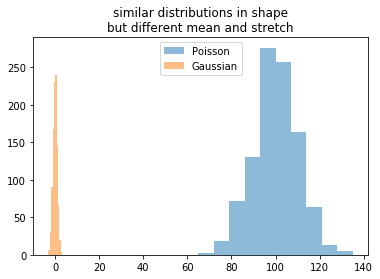

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


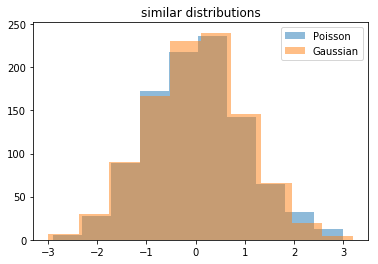

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


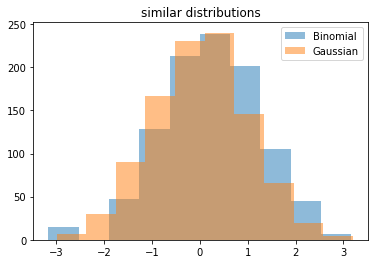

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456722, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [29]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


i will leave it to you to study the outputs in detail, but lets use the statistics. 

the statistics value will be **larger** if the distributions are **not** likely to be related. 
think about this in terms of rejection of the NULL hypothesis. 

# try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)

# KL DIVERGENCE

The KL divergence is a little trickier: 

__ empirical distribution__ 
it wants to know the distribution _y_ value at a location _x_.  have to pass it the values of the _distribution_ at some x's, not my histogram though, si I need a  **NORMALIZED HOSTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data. 

__model__
Then I have to pass it a function for my comparison distribution evaluated at the same _x_-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

In [30]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest


then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

In [31]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00101782464642
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


# BINOMIAL - INSTRUCTIONS for assignment

with the binomial distribution I can change n*p. larger n*p will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as you increase the value of n*p.

In [88]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)
    

You want to see how the p-value (or the test statistics) behaves as a function of increasing n*p.
So you can plot the p-value (or the test statistics) against the n*p

think about how the captions are written in the paper  you have to read for last week assignment: a caption must describe the plot sufficiently well that I do not need to read the paper to understand it. 

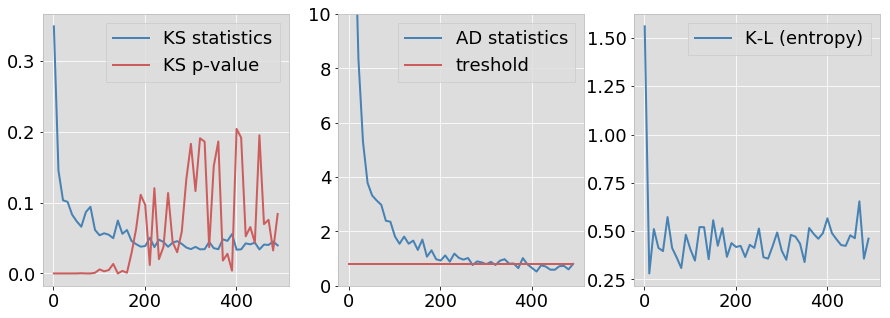

In [89]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

## WRITE A CAPTION HERE IN THIS CELL..

# POISSON - repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution

# NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


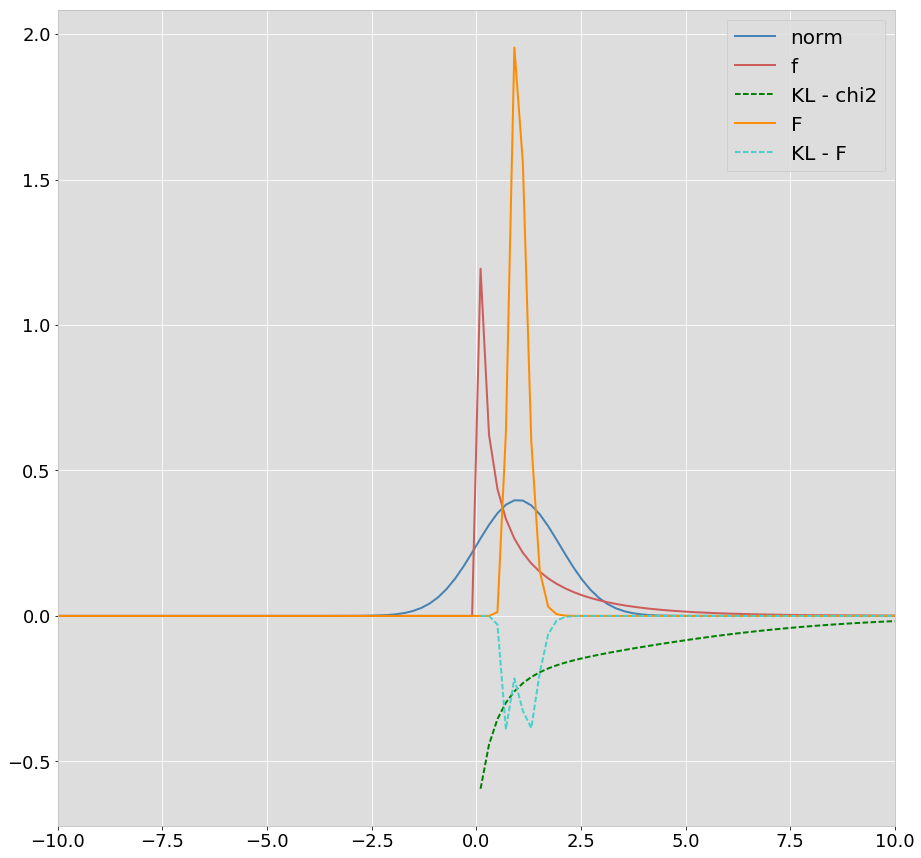

In [95]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);